# Classification

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report
import joblib

## Importing and cleaning data

In [5]:
diabete=pd.read_csv("data/diabetes.csv")

In [6]:
diabete.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:

diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Random Forest Model

In [8]:
from sklearn.model_selection import train_test_split

X = diabete.drop('Outcome', axis=1)  # predictors
y = diabete['Outcome']  # target

# Divide data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To optimise a Random Forest model, 2 parameters are essential :
- **n_estimators** : the number of trees in the forest
We should find a compromise between precision and computation time.

- **max_depth** : the maximum depth of the tree
It is recommended to set this parameter to avoid overfitting as the square root of the number of variables.

In [9]:
from sklearn.ensemble import RandomForestClassifier

max_features = int(np.sqrt(X.shape[1]))
random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42,oob_score=True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_features=2, oob_score=True, random_state=42)

In [10]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# predict on traingin set and testing set
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

In [11]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Create a DataFrame with the metrics
performance_table = pd.DataFrame({
    'Metrics': ['Accuracy', 'AUC', 'Recall'],
    'traingin set': [train_accuracy, train_auc, train_recall],
    'testing set': [test_accuracy, test_auc, test_recall]
})
print(performance_table)

    Metrics  traingin set  testing set
0  Accuracy           1.0     0.720779
1       AUC           1.0     0.697980
2    Recall           1.0     0.618182


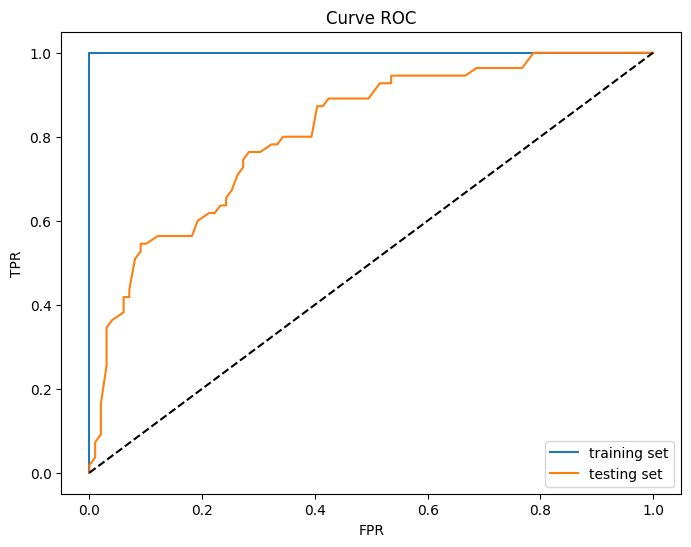

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
 
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# calculate fpr : false positive rate, tpr: true positive rate
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# ROC curve plot (Receiver Operating Characteristic)
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='training set')
plt.plot(test_fpr, test_tpr, label='testing set')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curve ROC')
plt.legend()
plt.show()

ROC is a graphical tool used to evaluate performance of a binary classifier.

## Obtain the best variables

Importance of variables :
                   Variable  Importance
0                   Glucose    0.258864
1                       BMI    0.169984
2                       Age    0.140931
3  DiabetesPedigreeFunction    0.123768
4             BloodPressure    0.088134
5               Pregnancies    0.076551
6                   Insulin    0.076122
7             SkinThickness    0.065646



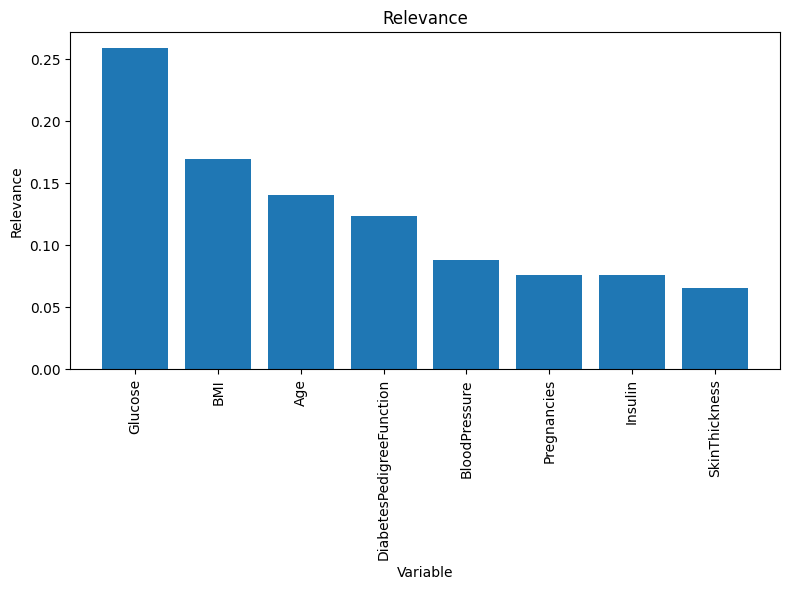

In [13]:


importance = random_forest.feature_importances_

# Dataframe
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print("Importance of variables :")
print(importance_df)
print()
 
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Relevance')
plt.title('Relevance')
plt.tight_layout()
plt.show()

In [14]:
joblib.dump(random_forest, 'random_forest_model.pkl')

['random_forest_model.pkl']